### Python para Data Science 
### Edgar Acuna
###   Organizacion y Presentacion de Datos Bivariados
#### Se usaran las librerias pandas, numpy, matplotlib, plotnine, statmodels y seaborn para hacer tablas de clasificacion cruzada y graficas de barras en cluster o en stack, boxplots para comparar grupos scatterplots y la linea de regresion (prediccion)
#### Agosto 2019

In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotnine
import statsmodels.formula.api as sm 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Caso I: Ambas variables categoricas

In [60]:
# Haciendo una tabla de clasificacion cruzada con datos resumidos
df=pd.read_csv("https://academic.uprm.edu/eacuna/eje2biv.csv",sep=",")
df.head()

,Sexo,Opinion,conteo
0,male,si,10
1,male,no,20
2,male,abst,30
3,female,si,15
4,female,no,31


In [61]:
#construyendo la tabla
pd.pivot_table(df,values='conteo',index='Sexo',columns='Opinion',aggfunc=np.sum)

Opinion,abst,no,si
Sexo,,,
female,44,31,15
male,30,20,10


In [62]:
#Haciendo una tabla de clasificacion xruzada sin datos resumidos
#Este conjunto de datos esta disponible en kaggle.com
df=pd.read_csv("http://academic.uprm.edu/eacuna/student-mat.csv",sep=",")

In [63]:
df.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [64]:
# Haciendo una tabla de clasificacion cruzada para relacionar las variables school y
#Pstatus (situacion de los padres: A=estan separados T=estans juntos)
#los datos estan sueltos
pd.crosstab(df['school'],df['Pstatus'],margins=True)

Pstatus,A,T,All
school,,,
GP,38,311,349
MS,3,43,46
All,41,354,395


In [65]:
#Hallando proporciones por columna
pd.crosstab(df['school'],df['Pstatus'],normalize='columns')

Pstatus,A,T
school,,
GP,0.926829,0.878531
MS,0.073171,0.121469


In [66]:
#Hallando porcentajes por filas
pd.crosstab(df['school'],df['Pstatus'],normalize='index')*100

Pstatus,A,T
school,,
GP,10.888252,89.111748
MS,6.521739,93.478261


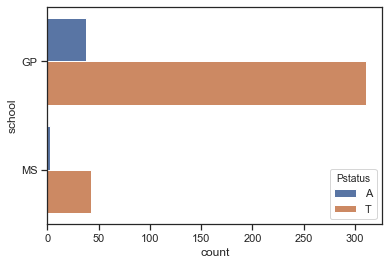

In [67]:
# Barras horizontales en cluster usando seaborn
sns.countplot(y='school', hue='Pstatus', data=df,orient='h')

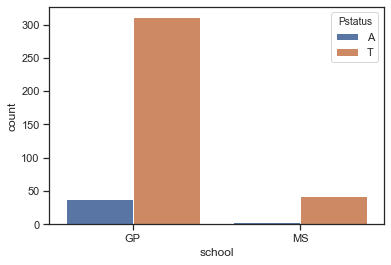

In [68]:
# Barras verticales  en cluster usando seaborn
sns.countplot(x='school', hue='Pstatus', data=df,orient='v')

In [69]:
# Obteniendo una tabla resumida para hacer las graficas de barras en matplotlib
p_table = pd.pivot_table(df,index='Pstatus',columns='school',aggfunc='size')
p_table

school,GP,MS
Pstatus,,
A,38,3
T,311,43


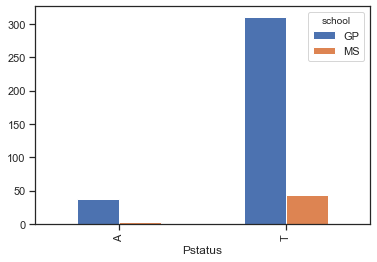

In [70]:
#Barras en cluster usando matplotlib
p_table.plot.bar(stacked=False)

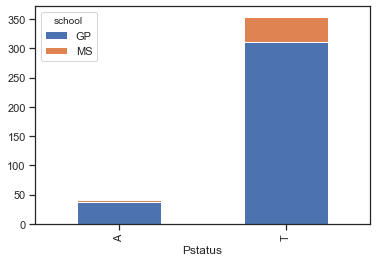

In [71]:
#Barras en stack usando matplotlib
p_table.plot.bar(stacked=True)

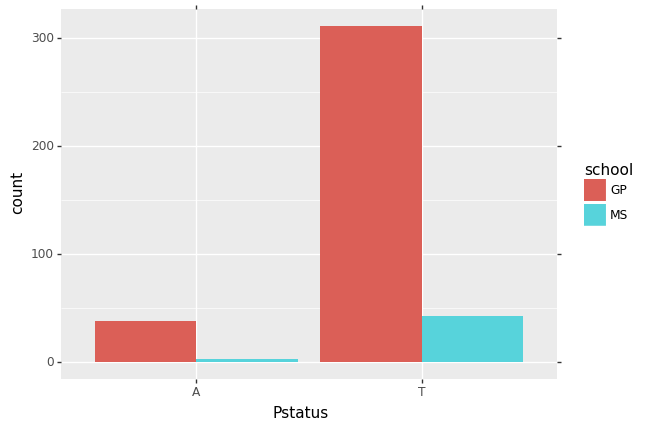

<ggplot: (128168041073)>

In [72]:
#cluster barras usando plotnine
from plotnine import *
#clustered bars
(ggplot(df, aes(x='Pstatus', fill='school'))
+ geom_bar(stat='count', position='dodge'))

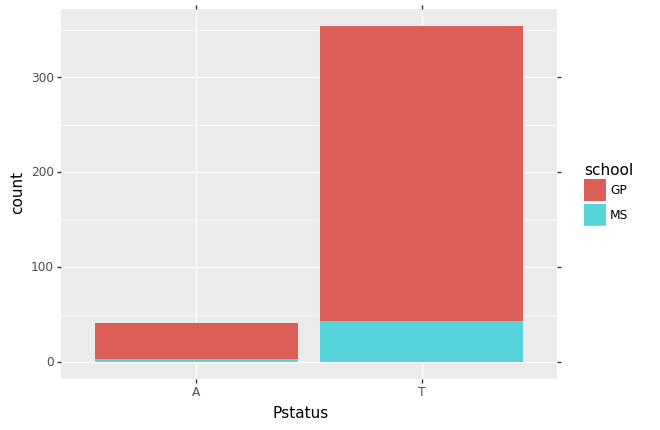

<ggplot: (128168040989)>

In [73]:
#Stacked bars usnado plotnine
(ggplot(df,aes(x='Pstatus',fill='school'))+geom_bar(stat='count'))

### Caso II. Una variable categoria y la otra cuantitativa

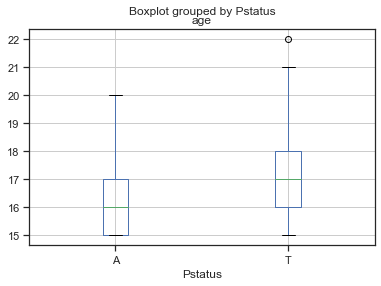

In [74]:
df.boxplot(column='age',by='Pstatus')

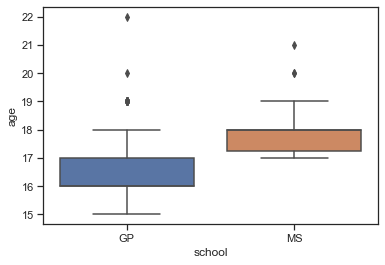

In [75]:
# Barras horizontales en cluster usando seaborn
sns.boxplot(x='school', y='age', data=df,orient='v')

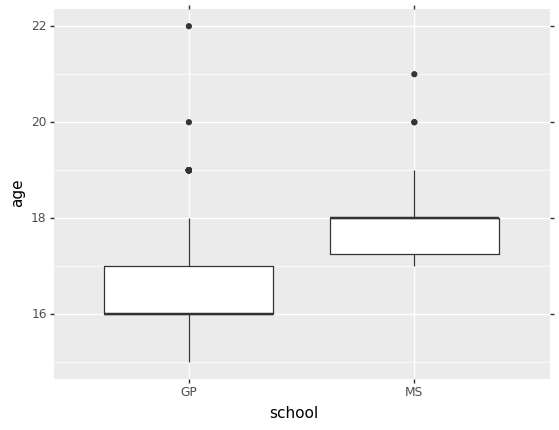

<ggplot: (128169640533)>

In [76]:
#usando plotnine
(ggplot(df,aes(x='school',y='age'))+geom_boxplot())

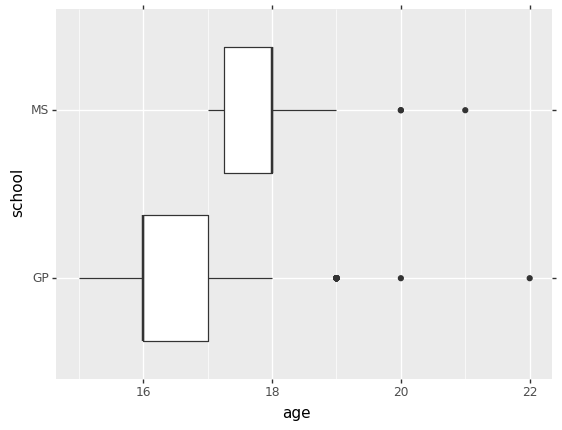

<ggplot: (128169645814)>

In [77]:
#Boxplot horizontales usando plotnine
(ggplot(df,aes(x='school',y='age'))+geom_boxplot()+coord_flip())

### Caso III. Ambas variables son cuantitativas

In [78]:
#Leyendo los datost"
df=pd.read_table("http://academic.uprm.edu/eacuna/eje1reg.txt",sep="\s+")
df.head()

,Est,CEEB,GPA
0,1,425,2.81
1,2,495,2.56
2,3,600,2.92
3,4,610,3.18
4,5,612,2.51


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


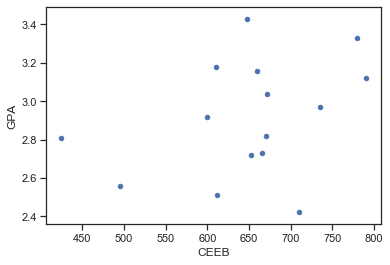

In [79]:
#scatterplot usando matplotlib
df.plot.scatter('CEEB','GPA')

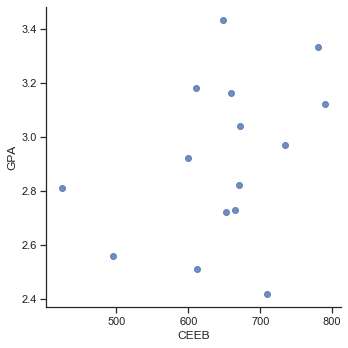

In [80]:
#scatteplot usando seaborn
sns.set(style="ticks")
sns.lmplot("CEEB", "GPA", data=df, fit_reg=False)

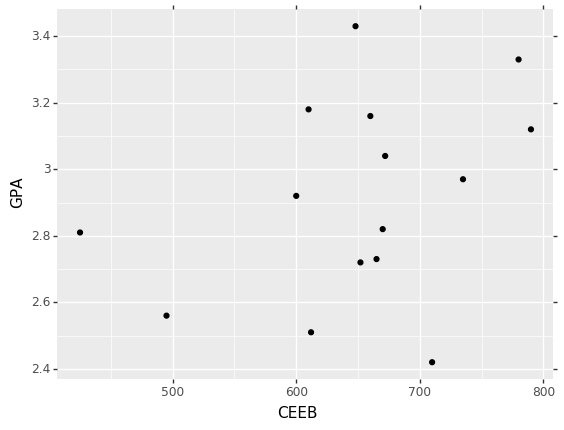

<ggplot: (-9223371908684859220)>

In [81]:
#scatterplot usando plotnine
(ggplot(df,aes(x='CEEB',y='GPA'))+geom_point())

In [82]:
#calculo de la correlacion
df.corr()['GPA']['CEEB']

0.3480352973395258

In [83]:
# calculo  de la linea de regresion
result = sm.ols(formula="GPA ~ CEEB", data=df).fit()
print(result.params)

Intercept    2.209878
CEEB         0.001087
dtype: float64


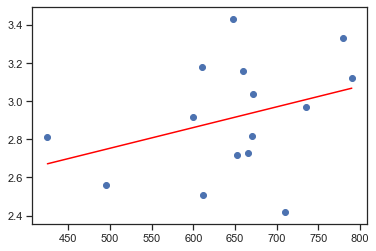

In [84]:
# Ploteando los puntos y la linea de regresion
x=df['CEEB']
y=df['GPA']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

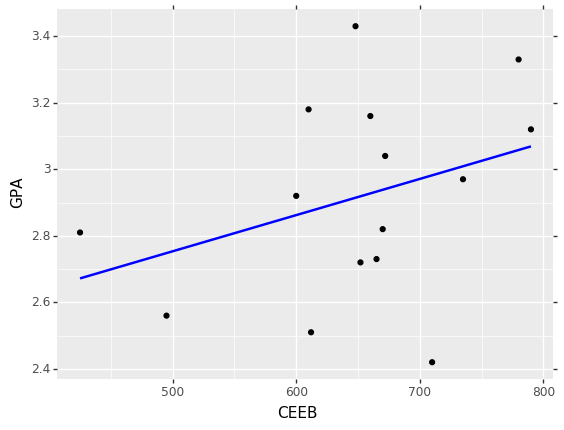

<ggplot: (128169959365)>

In [85]:
#Ploteando la linea de regresion usando plotnine
(ggplot(df, aes(x='CEEB', y='GPA')) + geom_point() + stat_smooth(method='lm',color='blue',se=False, span=0.2))

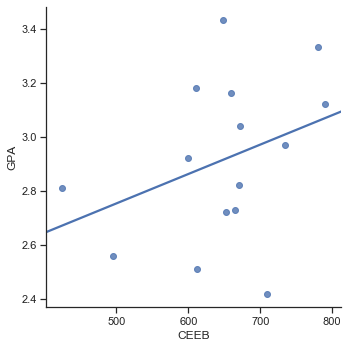

In [86]:
#PLoteando la linea de regresion usando seaborn
sns.set(style="ticks")
sns.lmplot("CEEB", "GPA", data=df,ci=False) 